### Universidad del Valle de Guatemala
#### Deep Learning
##### Recomenadaciones basadas en filtros
##### Integrantes:
1. Jose Hernandez 20053
2. Pablo Gonzalez 20362


##### Impotar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model
from tensorflow.keras.models import load_model

#### Leer data

In [4]:
data = pd.read_csv('./data/merged_data.csv')

Mostrar las primeras 5 filas de la data

In [5]:
data.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


Describe de las variables numericas en el dataset

In [6]:
data.describe()

,User-ID,Book-Rating,Year-Of-Publication
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,1.968195e+03
std,8.052466e+04,3.854157e+00,2.311010e+02
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,1.992000e+03
50%,1.412100e+05,0.000000e+00,1.997000e+03
75%,2.114260e+05,7.000000e+00,2.001000e+03
max,2.788540e+05,1.000000e+01,2.050000e+03


Shape del dataset

In [7]:
data.shape

(1031136, 7)

Tipos de datos en el dataset

In [8]:
data.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
dtype: object

Verificar si hay valores Nulos

In [9]:
print(data.isnull().sum())

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64


Eliminar las filas vacias

In [10]:
data = data.dropna()

Valores unicos por columna

In [11]:
print(data.nunique())

User-ID                 92106
ISBN                   270148
Book-Rating                11
Book-Title             241069
Book-Author            101587
Year-Of-Publication       116
Publisher               16728
dtype: int64


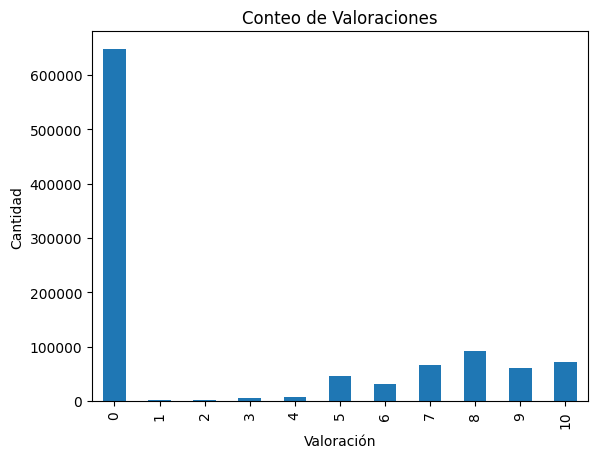

In [12]:
data['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Conteo de Valoraciones')
plt.xlabel('Valoración')
plt.ylabel('Cantidad')
plt.show()


In [13]:
media_valoraciones = data['Book-Rating'].mean()
media_valoraciones

2.8390343437752454

### Label Encoder

In [14]:
# Codificar User-IDs y ISBNs
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()
book_title_encoder = LabelEncoder()
book_author_encoder = LabelEncoder()
publisher_encoder = LabelEncoder()

data['ISBN'] = book_encoder.fit_transform(data['ISBN'])
data['User-ID'] = user_encoder.fit_transform(data['User-ID'])
data['Book-Title'] = book_title_encoder.fit_transform(data['Book-Title'])
data['Book-Author'] = book_author_encoder.fit_transform(data['Book-Author'])
data['Publisher'] = publisher_encoder.fit_transform(data['Publisher'])


In [15]:
data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,91362,45921,0,67829,61681,2002,1388
1,711,45921,5,67829,61681,2002,1388
2,2040,45921,0,67829,61681,2002,1388
3,2721,45921,5,67829,61681,2002,1388
4,3202,45921,9,67829,61681,2002,1388
...,...,...,...,...,...,...,...
1031131,91356,109402,0,123563,24408,1995,12403
1031132,91356,230728,7,77086,89213,1996,8090
1031133,91357,128230,0,222387,21498,1997,838
1031134,91358,144855,0,2960,51694,1997,15649


In [16]:
data.dtypes

User-ID                int64
ISBN                   int32
Book-Rating            int64
Book-Title             int32
Book-Author            int32
Year-Of-Publication    int64
Publisher              int32
dtype: object

### Cojuntos de entrenamiento y prueba


In [17]:
data = data.rename(columns={'User-ID': 'user_id', 'ISBN': 'book_id', 'Book-Rating': 'rating','Book-Title': 'book_title', 'Book-Author': 'book_author', 'Year-Of-Publication': 'year_of_publication', 'Publisher': 'publisher'})

In [18]:
data

,user_id,book_id,rating,book_title,book_author,year_of_publication,publisher
0,91362,45921,0,67829,61681,2002,1388
1,711,45921,5,67829,61681,2002,1388
2,2040,45921,0,67829,61681,2002,1388
3,2721,45921,5,67829,61681,2002,1388
4,3202,45921,9,67829,61681,2002,1388
...,...,...,...,...,...,...,...
1031131,91356,109402,0,123563,24408,1995,12403
1031132,91356,230728,7,77086,89213,1996,8090
1031133,91357,128230,0,222387,21498,1997,838
1031134,91358,144855,0,2960,51694,1997,15649


In [19]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

### Modelo

In [20]:

n_users = data['user_id'].nunique()
n_books = data['book_title'].nunique()

# Crear el modelo de filtrado colaborativo
user_input = Input(shape=[1,], name='user_input')
user_embedding = Embedding(n_users+1, 5, name='user_embedding')(user_input)
user_vec = Flatten(name='user_vec')(user_embedding)

book_input = Input(shape=[1], name='book_input')
book_embedding = Embedding(n_books+1, 5, name='book_embedding')(book_input)
book_vec = Flatten(name='book_vec')(book_embedding)


conc = Concatenate()([user_vec,book_vec])

fc1 = Dense(256, activation='relu')(conc)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(128, activation='relu')(fc2)
out = Dense(1)(fc3)

model = Model([user_input, book_input],out)
model.compile(loss='mean_squared_error', optimizer='adam')



In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 book_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 5)         460535      ['user_input[0][0]']             
                                                                                                  
 book_embedding (Embedding)     (None, 1, 5)         1205350     ['book_input[0][0]']             
                                                                                              

In [84]:
history = model.fit([train.user_id, train.book_title], train.rating, epochs=5, verbose=1)


Epoch 1/5
25779/25779 [==============================] - 371s 14ms/step - loss: 11.4183
Epoch 2/5
25779/25779 [==============================] - 345s 13ms/step - loss: 9.4561
Epoch 3/5
25779/25779 [==============================] - 353s 14ms/step - loss: 8.3575
Epoch 4/5
25779/25779 [==============================] - 352s 14ms/step - loss: 7.7535
Epoch 5/5
25779/25779 [==============================] - 343s 13ms/step - loss: 7.3373


Text(0, 0.5, 'Training Error')

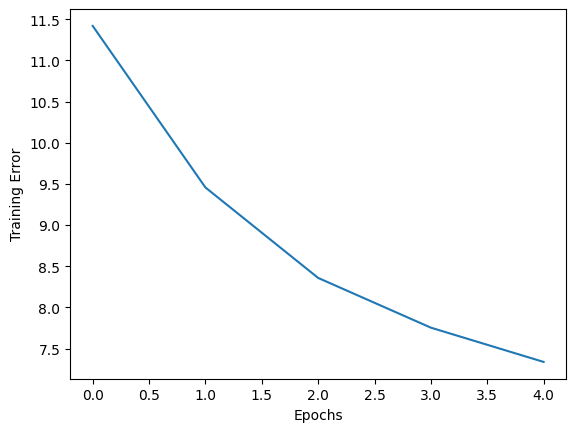

In [85]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [2]:
modelo = load_model('./Modelos/model_emmbeding.h5')

In [25]:
# ID del usuario para el que queremos realizar las recomendaciones
user_id = 123  # Cambia esto al ID del usuario para el que deseas recomendaciones

# Crear un array con todos los IDs de libros únicos
all_books = data['book_title'].unique()

# Crear un DataFrame con todos los libros y el ID del usuario para realizar predicciones
user_books = pd.DataFrame({'user_id': [user_id] * len(all_books), 'book_title': all_books})

# Obtener las predicciones del modelo para todos los libros y el usuario en cuestión
predictions = modelo.predict([user_books['user_id'], user_books['book_title']])

# Agregar las predicciones al DataFrame de libros del usuario
user_books['predicted_rating'] = predictions

# Ordenar los libros por las predicciones de mayor a menor y seleccionar los 10 mejores
top_10_recommendations = user_books.sort_values(by='predicted_rating', ascending=False).head(10)

# Mostrar las recomendaciones
print(top_10_recommendations)


7534/7534 [==============================] - 5s 662us/step
        user_id  book_title  predicted_rating
44629       123      240445          9.710107
149097      123       95491          9.702327
36243       123      153683          9.699008
21236       123      192719          9.698925
163068      123       88650          9.697206
71597       123       16307          9.696734
30738       123       97326          9.696652
155227      123      113837          9.695389
93400       123      116137          9.695090
96210       123       95595          9.693981


In [86]:
model.save('./Modelos/model_emmbeding.h5')